In [1]:
##### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/.DS_Store
/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/Breast Cancer Wisconsin Dataset.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data='/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/Breast Cancer Wisconsin Dataset.csv'
df=pd.DataFrame(pd.read_csv(data))

In [4]:
df.drop(['radius_se', 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst','Unnamed: 32'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [5]:
col_names=['diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points'
         ,'symmetry','fractal_dimension']
df.columns=col_names
df.columns

Index(['diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'concavity', 'concave_points', 'symmetry',
       'fractal_dimension'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius             569 non-null    float64
 2   texture            569 non-null    float64
 3   perimeter          569 non-null    float64
 4   area               569 non-null    float64
 5   smoothness         569 non-null    float64
 6   compactness        569 non-null    float64
 7   concavity          569 non-null    float64
 8   concave_points     569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [7]:
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [8]:
df['diagnosis']=df['diagnosis'].astype('category')

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis',axis=1)
y = df.diagnosis

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=108)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 10), (114, 10), (455,), (114,))

In [11]:
from sklearn.tree import DecisionTreeClassifier
DT_default = DecisionTreeClassifier(max_depth=5)
model_DT = DT_default.fit(X_train,y_train)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred_test_default = model_DT.predict(X_test)
print(classification_report(y_test,y_pred_test_default))

              precision    recall  f1-score   support

           B       0.97      0.94      0.96        71
           M       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [13]:
print(f' Confusion_Matrix: \n {confusion_matrix(y_test,y_pred_test_default)}','\n')
print(f' Accuracy_Score:\n {accuracy_score(y_test,y_pred_test_default)}')

 Confusion_Matrix: 
 [[67  4]
 [ 2 41]] 

 Accuracy_Score:
 0.9473684210526315


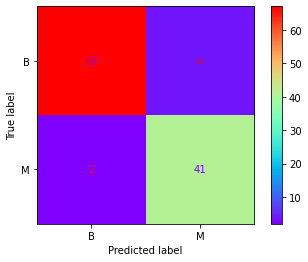

In [14]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_DT,X_test,y_test,cmap='rainbow')

In [15]:
features_name = list(df.columns)
classes = ['B', 'M']
features_name

['diagnosis',
 'radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave_points',
 'symmetry',
 'fractal_dimension']

In [16]:
classes

['B', 'M']

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_text

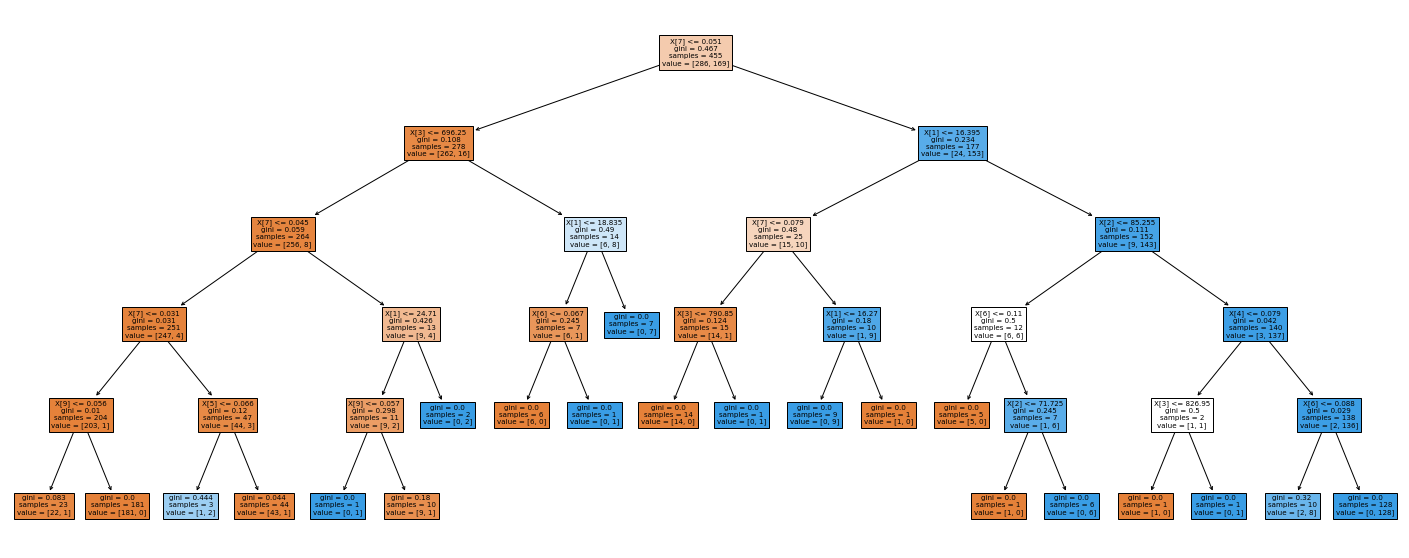

In [18]:
plt.figure(figsize=(25,10))
plot_tree(model_DT,filled=True)
plt.show()

In [19]:
text_representation = export_text(model_DT)
print(text_representation)

|--- feature_7 <= 0.05
|   |--- feature_3 <= 696.25
|   |   |--- feature_7 <= 0.04
|   |   |   |--- feature_7 <= 0.03
|   |   |   |   |--- feature_9 <= 0.06
|   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_9 >  0.06
|   |   |   |   |   |--- class: B
|   |   |   |--- feature_7 >  0.03
|   |   |   |   |--- feature_5 <= 0.07
|   |   |   |   |   |--- class: M
|   |   |   |   |--- feature_5 >  0.07
|   |   |   |   |   |--- class: B
|   |   |--- feature_7 >  0.04
|   |   |   |--- feature_1 <= 24.71
|   |   |   |   |--- feature_9 <= 0.06
|   |   |   |   |   |--- class: M
|   |   |   |   |--- feature_9 >  0.06
|   |   |   |   |   |--- class: B
|   |   |   |--- feature_1 >  24.71
|   |   |   |   |--- class: M
|   |--- feature_3 >  696.25
|   |   |--- feature_1 <= 18.84
|   |   |   |--- feature_6 <= 0.07
|   |   |   |   |--- class: B
|   |   |   |--- feature_6 >  0.07
|   |   |   |   |--- class: M
|   |   |--- feature_1 >  18.84
|   |   |   |--- class: M
|--- feature_7 >  0.05
|   

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [21]:
%%time
n_folds = 10
parameters = {'max_depth':range(1,50)}
dtree = DecisionTreeClassifier(criterion='gini',random_state=108)
GScv = GridSearchCV(estimator=dtree,param_grid=parameters,cv=n_folds,scoring='accuracy',return_train_score=True)
GScv.fit(X_train,y_train)

CPU times: user 2.83 s, sys: 19.6 ms, total: 2.85 s
Wall time: 2.85 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=108),
             param_grid={'max_depth': range(1, 50)}, return_train_score=True,
             scoring='accuracy')

In [22]:
scores_GScv = GScv.cv_results_
scores_GScv_df = pd.DataFrame(scores_GScv)
scores_GScv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002619,0.000799,0.001386,0.000511,1,{'max_depth': 1},0.826087,0.891304,0.956522,0.869565,...,0.907090,0.914425,0.916870,0.907317,0.912195,0.917073,0.904878,0.912195,0.912823,0.004965
1,0.002180,0.000064,0.001049,0.000077,2,{'max_depth': 2},0.826087,0.847826,0.913043,0.869565,...,0.929095,0.936430,0.933985,0.926829,0.936585,0.921951,0.926829,0.934146,0.932849,0.006153
2,0.002450,0.000043,0.000999,0.000028,3,{'max_depth': 3},0.891304,0.891304,0.934783,0.891304,...,0.960880,0.955990,0.953545,0.946341,0.946341,0.953659,0.943902,0.958537,0.953118,0.005510
3,0.002798,0.000354,0.001028,0.000221,4,{'max_depth': 4},0.913043,0.891304,0.934783,0.869565,...,0.970660,0.965770,0.975550,0.970732,0.965854,0.968293,0.968293,0.980488,0.971185,0.004471
4,0.003049,0.000207,0.001035,0.000079,5,{'max_depth': 5},0.913043,0.869565,0.934783,0.869565,...,0.982885,0.977995,0.990220,0.985366,0.982927,0.980488,0.975610,0.990244,0.984617,0.005350


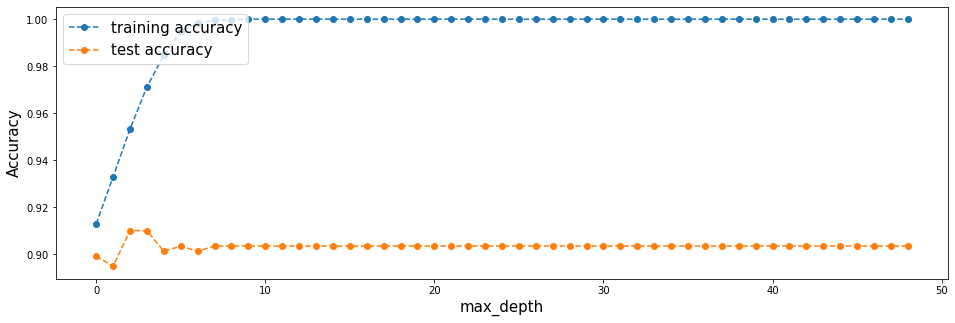

In [23]:
plt.figure(figsize=(16,5))

plt.plot(scores_GScv_df['mean_train_score'],label="training accuracy",marker='o',linestyle='dashed')
plt.plot(scores_GScv_df['mean_test_score'],label="test accuracy",marker='o',linestyle='dashed')

plt.legend(loc="upper left", prop={'size':15})
plt.xlabel("max_depth", size=15) 
plt.ylabel("Accuracy", size=15)

plt.show()

In [24]:
DT_default = DecisionTreeClassifier(max_depth=4)
model_DT = DT_default.fit(X_train,y_train)
y_pred_test_default = model_DT.predict(X_test)
print(classification_report(y_test,y_pred_test_default))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [25]:
print(f' Confusion_Matrix: \n {confusion_matrix(y_test,y_pred_test_default)}','\n')
print(f' Accuracy_Score:\n {accuracy_score(y_test,y_pred_test_default)}')

 Confusion_Matrix: 
 [[69  2]
 [ 2 41]] 

 Accuracy_Score:
 0.9649122807017544


In [26]:
%%time
n_folds = 10
parameters = {'min_samples_leaf':range(5,200,20)}
dtree = DecisionTreeClassifier(criterion='gini',random_state=108)
GScv = GridSearchCV(estimator=dtree,param_grid=parameters,scoring='accuracy',cv=n_folds,return_train_score=True)
GScv.fit(X_train,y_train)

CPU times: user 513 ms, sys: 6.3 ms, total: 520 ms
Wall time: 520 ms


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=108),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [27]:
scores_GScv = GScv.cv_results_
scores_GScv_df = pd.DataFrame(scores_GScv)
scores_GScv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003635,0.000544,0.001348,0.000178,5,{'min_samples_leaf': 5},0.934783,0.891304,0.934783,0.826087,...,0.965770,0.970660,0.97555,0.970732,0.965854,0.958537,0.965854,0.968293,0.968257,0.004346
1,0.002711,0.000223,0.001150,0.000160,25,{'min_samples_leaf': 25},0.847826,0.869565,0.913043,0.869565,...,0.919315,0.914425,0.93154,0.907317,0.914634,0.917073,0.904878,0.934146,0.919174,0.009123
2,0.002472,0.000193,0.001223,0.000271,45,{'min_samples_leaf': 45},0.826087,0.891304,0.956522,0.869565,...,0.907090,0.914425,0.91687,0.907317,0.912195,0.917073,0.904878,0.912195,0.912823,0.004965
3,0.002441,0.000207,0.001180,0.000155,65,{'min_samples_leaf': 65},0.826087,0.891304,0.956522,0.869565,...,0.907090,0.914425,0.91687,0.907317,0.912195,0.917073,0.904878,0.912195,0.912823,0.004965
4,0.002151,0.000161,0.001072,0.000085,85,{'min_samples_leaf': 85},0.826087,0.891304,0.956522,0.869565,...,0.907090,0.914425,0.91687,0.907317,0.912195,0.917073,0.904878,0.912195,0.912823,0.004965


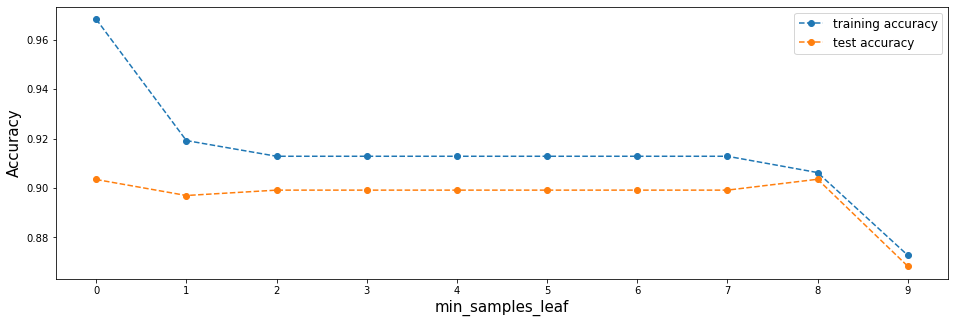

In [28]:
plt.figure(figsize=(16,5))

plt.plot(scores_GScv_df['mean_train_score'],label="training accuracy",marker='o',linestyle='dashed')
plt.plot(scores_GScv_df['mean_test_score'],label="test accuracy",marker='o',linestyle='dashed')

plt.legend(loc="best", prop={'size':12}) # loc = best,upper right,upper left,lower left,lower right,right,center left,center right,lower center,upper center,center
plt.xlabel("min_samples_leaf", size=15) 
plt.ylabel("Accuracy", size=15)
plt.xticks(range(0,10,1))

plt.show()

In [29]:
%%time
n_folds = 10
parameters = {"min_samples_split":range(5,200,20)}
dtree = DecisionTreeClassifier(criterion='gini',random_state=108)
GScv = GridSearchCV(dtree,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)
GScv.fit(X_train,y_train)

CPU times: user 577 ms, sys: 5.47 ms, total: 582 ms
Wall time: 581 ms


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=108),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [30]:
scores_GScv = GScv.cv_results_
scores_GScv_df = pd.DataFrame(scores_GScv)
scores_GScv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003398,0.000469,0.001161,0.000209,5,{'min_samples_split': 5},0.913043,0.869565,0.869565,0.869565,...,0.982885,0.99022,0.995110,0.990244,0.992683,0.987805,0.995122,0.995122,0.991941,0.003948
1,0.002923,0.000163,0.001049,0.000180,25,{'min_samples_split': 25},0.804348,0.826087,0.869565,0.869565,...,0.938875,0.95110,0.960880,0.939024,0.941463,0.960976,0.931707,0.941463,0.946769,0.009352
2,0.002901,0.000180,0.000982,0.000046,45,{'min_samples_split': 45},0.804348,0.847826,0.913043,0.869565,...,0.933985,0.94132,0.933985,0.931707,0.936585,0.943902,0.926829,0.939024,0.938221,0.006527
3,0.002871,0.000207,0.000969,0.000041,65,{'min_samples_split': 65},0.826087,0.847826,0.913043,0.869565,...,0.933985,0.94132,0.933985,0.931707,0.936585,0.924390,0.926829,0.939024,0.935047,0.005751
4,0.002933,0.000286,0.001007,0.000093,85,{'min_samples_split': 85},0.826087,0.847826,0.913043,0.869565,...,0.933985,0.94132,0.933985,0.931707,0.936585,0.924390,0.926829,0.939024,0.935047,0.005751


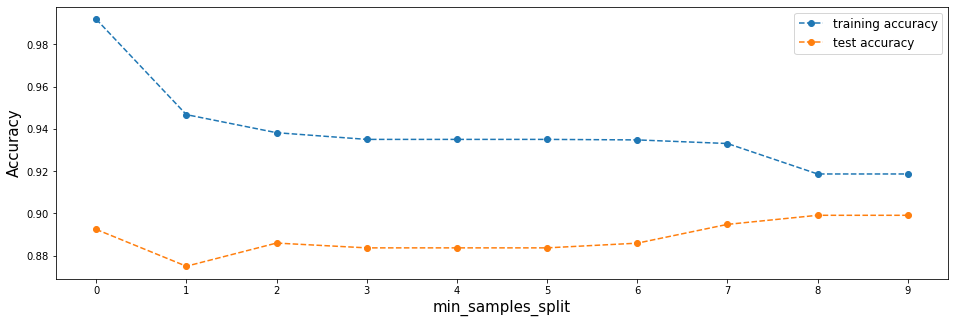

In [31]:
plt.figure(figsize=(16,5))

plt.plot(scores_GScv_df['mean_train_score'],label="training accuracy",marker='o',linestyle='dashed')
plt.plot(scores_GScv_df['mean_test_score'],label="test accuracy",marker='o',linestyle='dashed')

plt.legend(loc="best", prop={'size':12}) # loc = best,upper right,upper left,lower left,lower right,right,center left,center right,lower center,upper center,center
plt.xlabel("min_samples_split",size=15) 
plt.ylabel("Accuracy",size=15)
plt.xticks(range(0,10,1))

plt.show()

In [32]:
%%time
param_grid = {
    'max_depth': range(1,15,1),
    'min_samples_leaf': range(1,100,10),
    'min_samples_split': range(1,100,10),
    'criterion': ["entropy","gini"]}
n_folds = 10
dtree = DecisionTreeClassifier(random_state=108)
grid_search = GridSearchCV(estimator=dtree,param_grid=param_grid,cv=n_folds,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 2800 candidates, totalling 28000 fits
CPU times: user 1min 39s, sys: 788 ms, total: 1min 40s
Wall time: 1min 40s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=108),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(1, 100, 10),
                         'min_samples_split': range(1, 100, 10)},
             verbose=1)

In [33]:
cv_results = grid_search.cv_results_
pd.DataFrame(cv_results).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002013,0.000280,0.000000,0.000000,entropy,1,1,1,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2800
1,0.002034,0.000190,0.001012,0.000083,entropy,1,1,11,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.826087,...,0.891304,0.847826,0.977778,0.911111,0.866667,1.0,0.888889,0.905749,0.053487,41
2,0.001939,0.000070,0.000956,0.000058,entropy,1,1,21,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.826087,...,0.891304,0.847826,0.977778,0.911111,0.866667,1.0,0.888889,0.905749,0.053487,41
3,0.001927,0.000060,0.000950,0.000041,entropy,1,1,31,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.826087,...,0.891304,0.847826,0.977778,0.911111,0.866667,1.0,0.888889,0.905749,0.053487,41
4,0.001954,0.000061,0.000969,0.000047,entropy,1,1,41,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.826087,...,0.891304,0.847826,0.977778,0.911111,0.866667,1.0,0.888889,0.905749,0.053487,41


In [34]:
print(f' Best Accuracy you can get:\n {grid_search.best_score_}\n','***'*15)
print(f' Best Hyperparameters Parameters & there Values: \n{grid_search.best_params_}')

 Best Accuracy you can get:
 0.9188405797101449
 *********************************************
 Best Hyperparameters Parameters & there Values: 
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 11}


In [35]:
dt_with_optimal_hyperparameters = DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=1,min_samples_split=11,random_state=108)
model_dt = dt_with_optimal_hyperparameters.fit(X_train,y_train)
model_dt


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=11,
                       random_state=108)

In [36]:
from sklearn import metrics
y_pred_test = model_dt.predict(X_test)
metrics.accuracy_score(y_test,y_pred_test)

0.9649122807017544

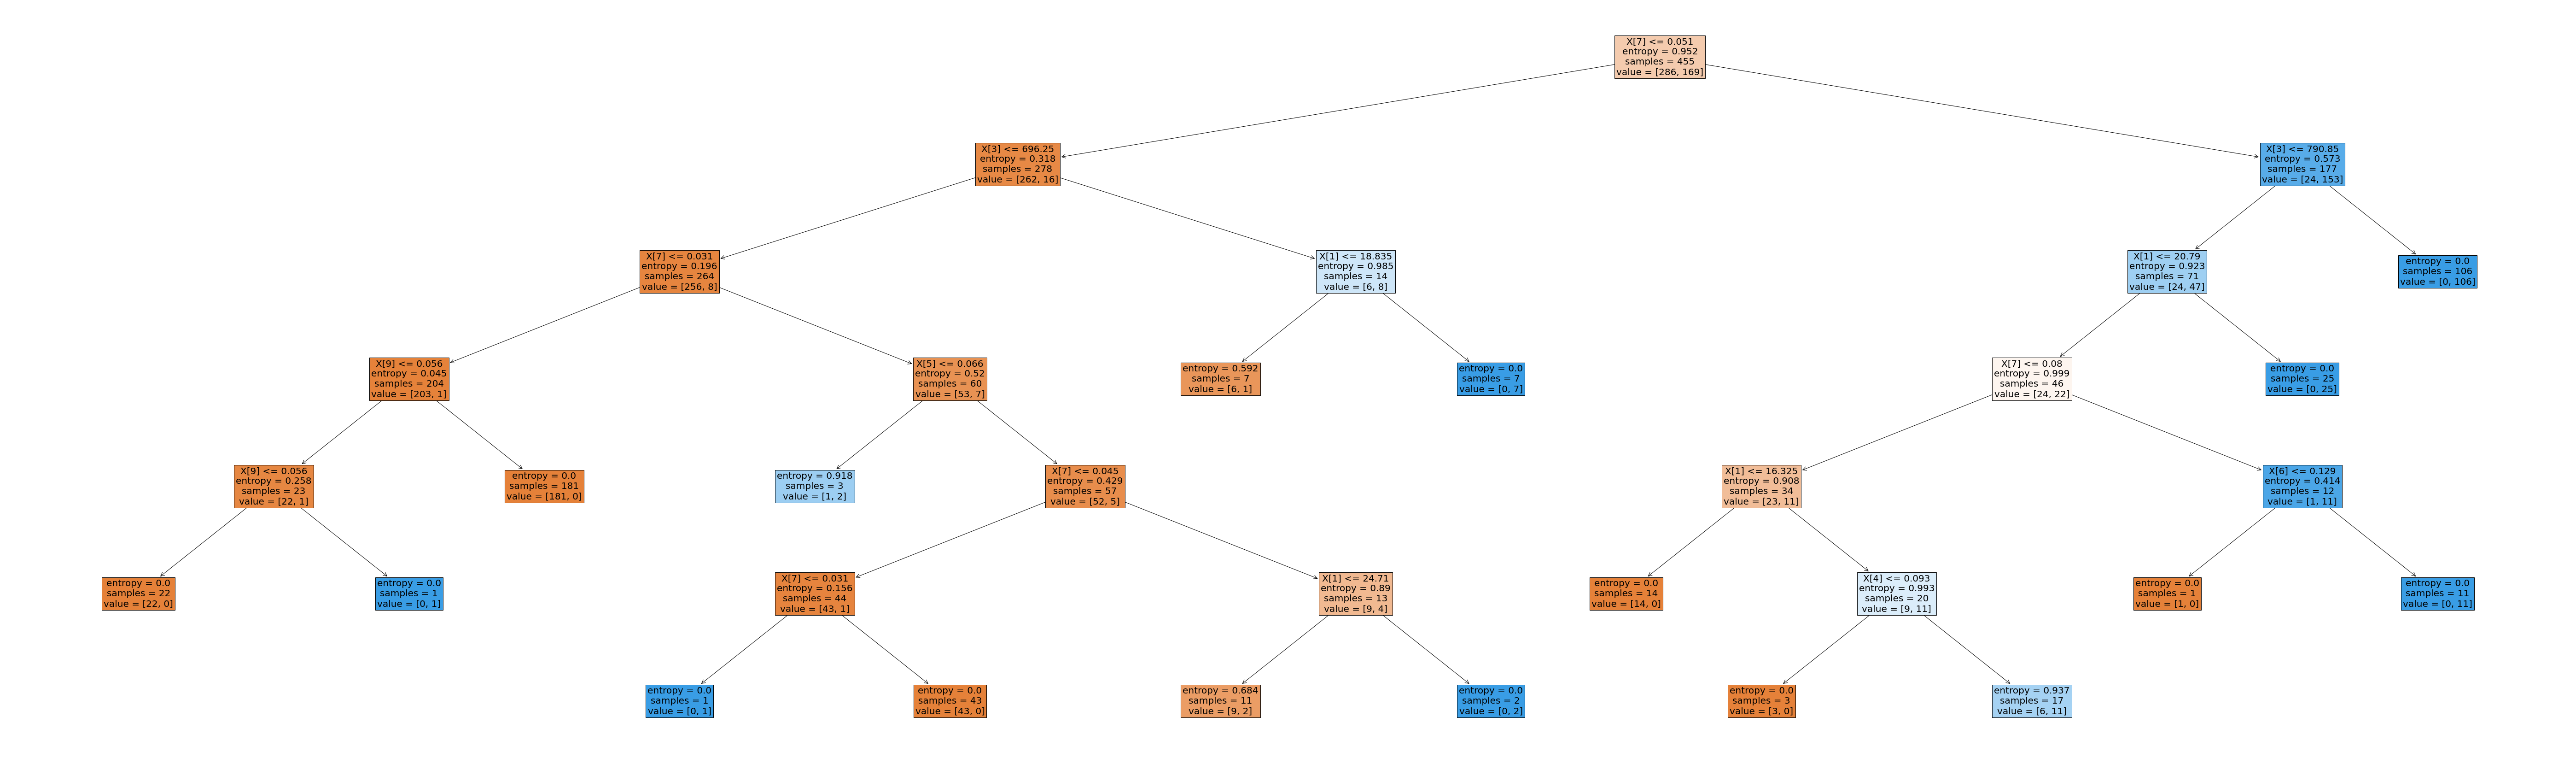

In [37]:
fig = plt.figure(figsize=(100,30))
plot_tree(model_dt,filled=True,fontsize=20)
plt.show()

In [38]:
print(export_text(model_dt))

|--- feature_7 <= 0.05
|   |--- feature_3 <= 696.25
|   |   |--- feature_7 <= 0.03
|   |   |   |--- feature_9 <= 0.06
|   |   |   |   |--- feature_9 <= 0.06
|   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_9 >  0.06
|   |   |   |   |   |--- class: M
|   |   |   |--- feature_9 >  0.06
|   |   |   |   |--- class: B
|   |   |--- feature_7 >  0.03
|   |   |   |--- feature_5 <= 0.07
|   |   |   |   |--- class: M
|   |   |   |--- feature_5 >  0.07
|   |   |   |   |--- feature_7 <= 0.04
|   |   |   |   |   |--- feature_7 <= 0.03
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- feature_7 >  0.03
|   |   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_7 >  0.04
|   |   |   |   |   |--- feature_1 <= 24.71
|   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- feature_1 >  24.71
|   |   |   |   |   |   |--- class: M
|   |--- feature_3 >  696.25
|   |   |--- feature_1 <= 18.84
|   |   |   |--- class: B
|   |   |--- feature_1 >  18.84
|   |   |   |--- 

In [39]:
dt_with_max_depth_optimal_hyperparameters =  DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=1,min_samples_split=11,random_state=108)
model_dt = dt_with_max_depth_optimal_hyperparameters.fit(X_train,y_train)
model_dt

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=11,
                       random_state=108)

In [40]:
y_pred_test = model_dt.predict(X_test)
metrics.accuracy_score(y_test,y_pred_test)

0.956140350877193

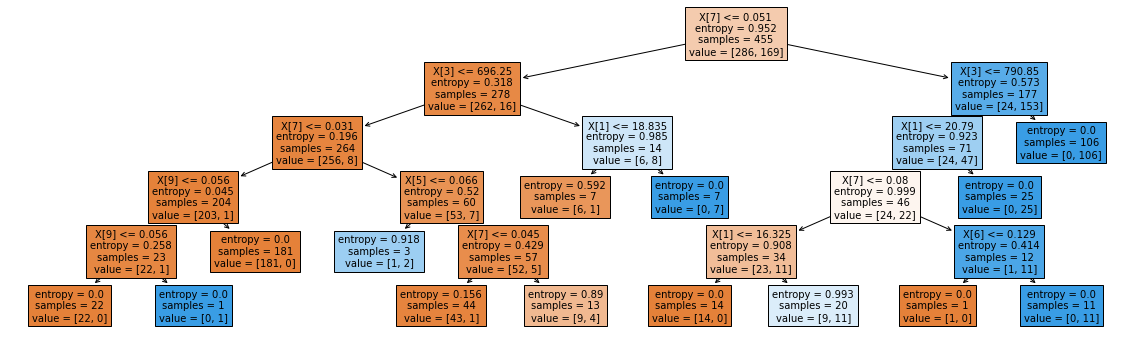

In [56]:
plt.figure(figsize=(20,6))
plot_tree(model_dt,filled=True,fontsize=10)
plt.show()

In [42]:
print(export_text(model_dt))

|--- feature_7 <= 0.05
|   |--- feature_3 <= 696.25
|   |   |--- feature_7 <= 0.03
|   |   |   |--- feature_9 <= 0.06
|   |   |   |   |--- feature_9 <= 0.06
|   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_9 >  0.06
|   |   |   |   |   |--- class: M
|   |   |   |--- feature_9 >  0.06
|   |   |   |   |--- class: B
|   |   |--- feature_7 >  0.03
|   |   |   |--- feature_5 <= 0.07
|   |   |   |   |--- class: M
|   |   |   |--- feature_5 >  0.07
|   |   |   |   |--- feature_7 <= 0.04
|   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_7 >  0.04
|   |   |   |   |   |--- class: B
|   |--- feature_3 >  696.25
|   |   |--- feature_1 <= 18.84
|   |   |   |--- class: B
|   |   |--- feature_1 >  18.84
|   |   |   |--- class: M
|--- feature_7 >  0.05
|   |--- feature_3 <= 790.85
|   |   |--- feature_1 <= 20.79
|   |   |   |--- feature_7 <= 0.08
|   |   |   |   |--- feature_1 <= 16.32
|   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_1 >  16.32
|   |   |   |   

In [43]:
print(metrics.classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           B       0.99      0.94      0.96        71
           M       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



[[67  4]
 [ 1 42]] 
 ******************************


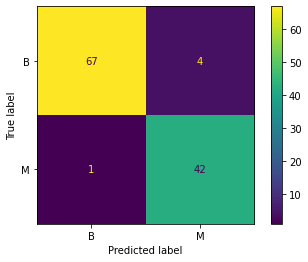

In [44]:
print(metrics.confusion_matrix(y_test,y_pred_test),'\n','***'*10)
plot_confusion_matrix(model_dt,X_test,y_test)
plt.show()

In [55]:
model_dt


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=11,
                       random_state=108)

In [46]:
pruning_path = model_dt.cost_complexity_pruning_path(X_train,y_train)
alphas, impurities = pruning_path.ccp_alphas,pruning_path.impurities

In [47]:
alphas

array([0.        , 0.01001272, 0.01091385, 0.01095086, 0.02121205,
       0.02320436, 0.02511275, 0.04305498, 0.05010011, 0.07872412,
       0.53493733])

In [48]:
impurities

array([0.09937161, 0.11939706, 0.13031091, 0.15221263, 0.17342468,
       0.21983339, 0.24494614, 0.28800112, 0.33810123, 0.41682535,
       0.95176268])

In [49]:
train_accuracy, test_accuracy = [],[]
for ccp_alpha in alphas:
    dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha,random_state=108)
    dt_clf.fit(X_train,y_train)
    y_pred_train= dt_clf.predict(X_train)
    y_pred_test= dt_clf.predict(X_test)
    train_accu = metrics.accuracy_score(y_pred_train,y_train)
    train_accuracy.append(train_accu)
    test_accu = metrics.accuracy_score(y_pred_test,y_test)
    test_accuracy.append(test_accu)

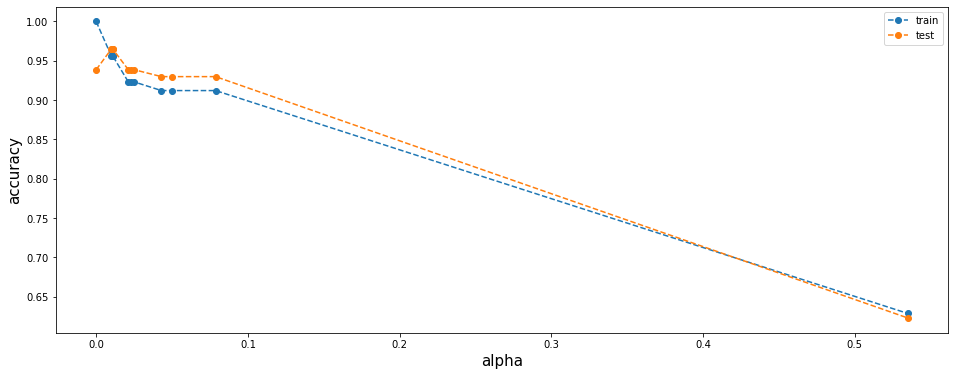

In [50]:
plt.figure(figsize=(16,6))

plt.plot(alphas,train_accuracy,label='train',marker='o',linestyle='dashed')
plt.plot(alphas,test_accuracy,label='test',marker='o',linestyle='dashed')

plt.legend(loc="best",prop={'size':10})
plt.xlabel('alpha',size=15)
plt.ylabel('accuracy',size=15)

plt.show()

In [51]:
model_dt

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=11,
                       random_state=108)

In [52]:
final_dt_clf = DecisionTreeClassifier(ccp_alpha=0.01,random_state=108)
final_model = final_dt_clf.fit(X_train,y_train)
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)
final_train_accuracy = metrics.accuracy_score(y_pred_train,y_train)
final_test_accuracy = metrics.accuracy_score(y_pred_test,y_test)
print(f' Final_train_accuracy\n {final_train_accuracy}','\n','***'*6)
print(f' Final_test_accuracy\n {final_test_accuracy}')

 Final_train_accuracy
 0.9560439560439561 
 ******************
 Final_test_accuracy
 0.9649122807017544


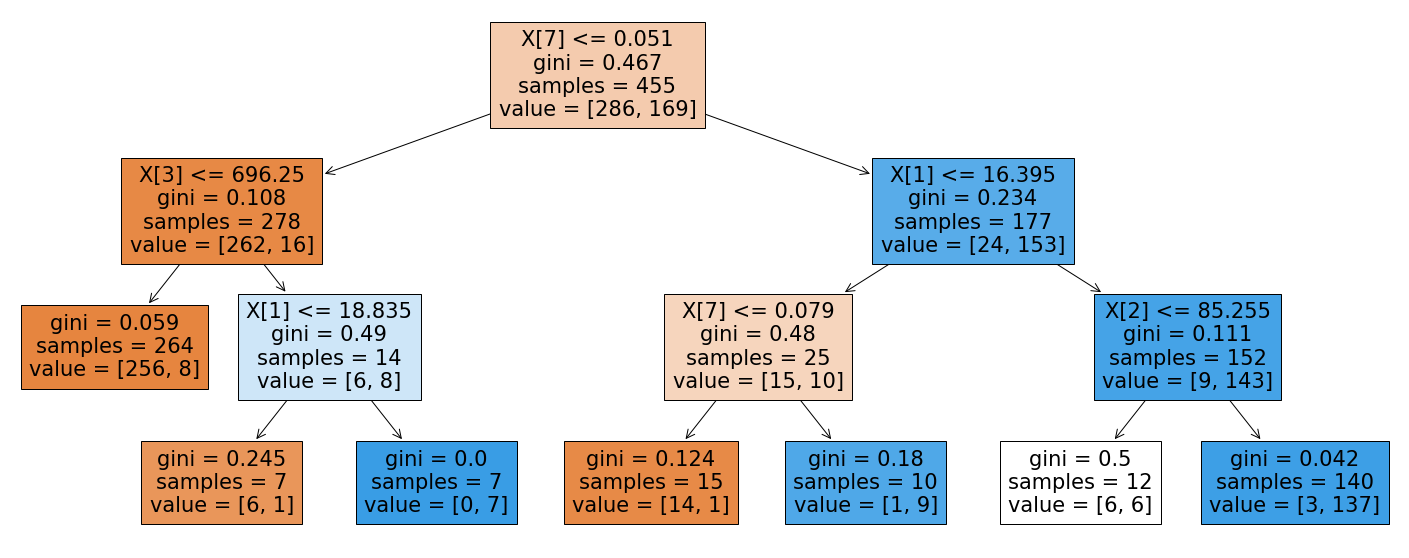

In [54]:
plt.figure(figsize=(25,10))

plot_tree(final_model,filled=True)

plt.show()